In [1]:
%matplotlib inline

import matplotlib as mpl
mpl.use('Agg')
from matplotlib.pyplot import imshow

/usr/lib/pymodules/python2.7/matplotlib/__init__.py:923: UserWarning:  This call to matplotlib.use() has no effect
because the the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  if warn: warnings.warn(_use_error_msg)


In [5]:
import model
from model.captcha_cracker import CaptchaCracker


msoftmax_model_params_prefix = '/home/geetika/captcha/dataset_ssd_1T/simpledataset_nvocab/msoftmax'
lstm_model_params_prefix = '/home/geetika/captcha/dataset_ssd_1T/complex_mix_dataset_nvocab/lstm_complexMix'

cracker = model.captcha_cracker.CaptchaCracker(lstm_model_params_prefix, multi_chars=True, num_softmaxes=None)

import os
from PIL import Image
import numpy
import random

#image_dir = '/home/geetika/captcha/dataset_ssd/simpledataset'
image_dir = '/home/geetika/captcha/dataset_ssd_1T/complex_mix_dataset/'
import model
files = os.listdir(image_dir)

The output file is available at /home/geetika/model_graph.png


/home/geetika/captcha/dataset_ssd_1T/complex_mix_dataset/10_8mWmxv8.jpg
aggunkunk
predicted_char= a
[('a', 0.01731376), ('r', 0.017278342), ('x', 0.017204061), ('e', 0.01714186), ('5', 0.016903032), ('p', 0.016780598), ('d', 0.016687781), ('3', 0.016663425), ('7', 0.016659778), ('w', 0.016618796)]
predicted_char= g
[('g', 0.018140012), ('y', 0.017583529), ('p', 0.017506322), ('r', 0.017389404), ('x', 0.017076893), ('d', 0.017033802), ('c', 0.016879456), ('n', 0.016812697), ('s', 0.016520189), ('h', 0.016459689)]
predicted_char= g
[('g', 0.01898472), ('d', 0.017799824), ('y', 0.017724723), ('r', 0.017379405), ('m', 0.0172283), ('p', 0.01707072), ('n', 0.017069688), ('c', 0.017009281), ('w', 0.016632009), ('e', 0.016587788)]
predicted_char= unk
[('unk', 0.018871868), ('g', 0.018341532), ('y', 0.017617276), ('m', 0.017278224), ('e', 0.016921028), ('w', 0.016834091), ('4', 0.016734149), ('d', 0.016641783), ('c', 0.016474966), ('r', 0.016352372)]
predicted_char= unk
[('unk', 0.074914418), (

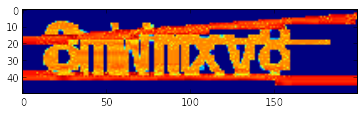

In [18]:
file_path = os.path.join(image_dir, random.choice(files))
print file_path

# Converted image.
imshow(numpy.asarray(Image.open(file_path).convert('L')))


predicted_chars, char_probabilities = cracker.InferFromImagePath(file_path)

print "".join(x for x in predicted_chars)

for i in range(len(predicted_chars)):
    print 'predicted_char= {0}'.format(predicted_chars[i])
    print sorted([(char, prob) for char, prob in char_probabilities[i].iteritems()], key=lambda x: x[1], reverse=True)[:10]